In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<h3>Penjelasan Kolom</h3>

<ol>
    <li><strong>age:</strong> Umur pasien (dalam tahun).</li>
    <li><strong>sex:</strong> Jenis kelamin pasien (0 = perempuan, 1 = laki-laki).</li>
    <li><strong>chest pain type:</strong> Jenis nyeri dada yang dialami oleh pasien. Nilainya berkisar dari 0 hingga 3, mewakili tingkat keparahan nyeri dada.</li>
    <li><strong>resting blood pressure:</strong> Tekanan darah istirahat pasien (dalam mmHg).</li>
    <li><strong>serum cholestoral:</strong> Kolesterol serum dalam mg/dl.</li>
    <li><strong>fasting blood sugar:</strong> Kadar gula darah puasa pasien yang diukur. Jika nilainya lebih dari 120 mg/dl, ditandai dengan 1, jika tidak, ditandai dengan 0.</li>
    <li><strong>resting electrocardiographic results:</strong> Hasil elektrokardiografi istirahat pasien. Nilainya berkisar dari 0 hingga 2, mewakili hasil yang berbeda dari elektrokardiografi istirahat.</li>
    <li><strong>maximum heart rate achieved:</strong> Denyut jantung maksimum yang dicapai oleh pasien.</li>
    <li><strong>exercise induced angina:</strong> Apakah pasien mengalami angina yang diinduksi oleh latihan fisik (0 = tidak, 1 = ya).</li>
    <li><strong>oldpeak:</strong> Depresi segmen ST yang diinduksi oleh latihan relatif terhadap istirahat.</li>
    <li><strong>slope:</strong> Bentuk kemiringan segmen ST selama latihan puncak.</li>
    <li><strong>number of major vessels:</strong> Jumlah pembuluh darah utama (0-3) yang terlihat berwarna pada hasil fluoroskopi.</li>
    <li><strong>thal:</strong> Jenis thalassemia pasien. Nilainya dapat 0 (normal), 1 (cacat tetap), atau 2 (cacat reversibel).</li>
    <li><strong>target:</strong> Target apakah ada kehadiran penyakit jantung pada pasien atau tidak. 0 (no disease) dan 1 (disease)</li>
</ol>

<h1>Preprocessing

<h2>Data Preparation

In [3]:
# Melihat missing values dalam data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# Melihat duplicated data dalam data
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
# Hapus data duplikat
df = df.drop_duplicates()

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [6]:
# Menghitung Z-Score untuk melihat outliers
z_scores = (df - df.mean()) / df.std()

threshold = 3

outliers = (np.abs(z_scores) > threshold)

outliers.sum()

age         0
sex         0
cp          0
trestbps    2
chol        4
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     2
slope       0
ca          4
thal        2
target      0
dtype: int64

In [7]:
# Menghapus baris yang mengandung outliers
df = df[~outliers.any(axis=1)]

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


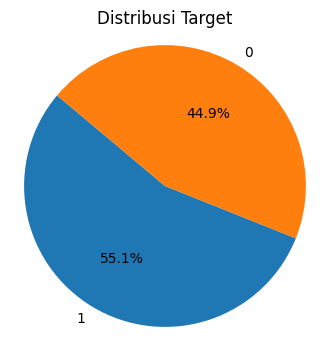

In [8]:
# Melihat apakah data imbalanced atau tidak berdasarkan pembagian kelasnya
target = df['target'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(target, labels=target.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Target')
plt.axis('equal')
plt.show()